Prepare Environment

In [ ]:
# Imports the required libraries
import cv2
import dlib
import math
import unittest
import numpy as np
import urllib.request

from scipy.spatial import distance
from matplotlib import pyplot as plt

###Getting the Dlib Shape predictor!
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Emotion%20Detection/shape_predictor_68_face_landmarks.dat"
dlibshape_path ='./shape_predictor_68_face_landmarks.dat'

print ("Done")

shape_predictor_68_ 100%[===================>]  95.08M   123MB/s    in 0.8s    
Done


Load Pretrained Dlib model

In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()

Convert to Bounding Box Coordinates

In [ ]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

Detect Face in a Given Image

In [ ]:
def detect_face(image_url):
  """
  :type image_url: str
  :rtype: None
  
  """
  try:
    
    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    
  except Exception as e:
    return "Please check the URL and try again!"
    
  #Detect faces using dlib model
  rects = frontalface_detector(image, 1)
  
  if len(rects) < 1:
    return "No Face Detected"
  
  # Loop over the face detections
  for (i, rect) in enumerate(rects):
    # Converts dlib rectangular object to bounding box coordinates
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  plt.imshow(image, interpolation='nearest')
  plt.axis('off')
  plt.show()

Load Dlib Models for Facial Landmark Detection

In [ ]:
# Load's dlib's pretrained face detector model
frontalface_detector = dlib.get_frontal_face_detector()
#Load the 68 face Landmark file
landmark_predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')

Return Facial Landmarks for a Given Image

In [ ]:
def get_landmarks(image_url):
  """
  :type image_url : str
  :rtype image : cv2 object
  :rtype landmarks : list of tuples where each tuple represents 
                     the x and y coordinates of facial keypoints
  """
  
  try:
    
    #Decodes image address to cv2 object
    url_response = urllib.request.urlopen(image_url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    
  except Exception as e:
    print ("Please check the URL and try again!")
    return None,None
  
  #Detect the Faces within the image
  faces = frontalface_detector(image, 1)
  if len(faces):
    landmarks = [(p.x, p.y) for p in landmark_predictor(image, faces[0]).parts()]
  else:
    return None,None
  
  return image,landmarks

Display Image with Facial Landmarks

In [ ]:
def plot_image_landmarks(image,face_landmarks):
  """
  :type image_path : str
  :type face_landmarks : list of tuples where each tuple represents 
                     the x and y coordinates of facial keypoints
  :rtype : None
  """
  radius = -1
  circle_thickness = 5
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)
    
  plt.imshow(image_copy, interpolation='nearest')
  plt.axis('off')
  plt.show()

Trying out Facial Landmark Detection

Enter the URL of the image: http://t2.gstatic.com/licensed-image?q=tbn:ANd9GcSStEXQ52SE6txqvnwfAyOZ-dt6fkkBqzcir0RaZkoG54dYK7UByieR90Nb18ON4rdZ6VyDNVuQdk1kXik


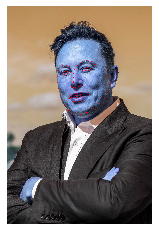

In [ ]:
image,landmarks= get_landmarks(input("Enter the URL of the image: ")) #url

#Plot the Facial Landmarks on the face
if landmarks:
  plot_image_landmarks(image,landmarks)
else:
  print ("No Landmarks Detected")

Visualize Features

In [ ]:
def show_indices(landmarks, i_index): 
  
  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2, len(landmarks))], 
              y=[-landmarks[i][1] for i in range(len(landmarks)//2, len(landmarks))], s=50, alpha=.5, color='blue', label='second half of indices') 

  plt.scatter(x=[landmarks[i][0] for i in range(len(landmarks)//2)], 
              y=[-landmarks[i][1] for i in range(len(landmarks)//2)], color='red', alpha=.5, label='first half of indices')

  # what should X and Y be to visualize the feature at i_index? 
  x = landmarks[i_index][0]
  y = -landmarks[i_index][1]
  plt.scatter(x=x, y=y, 
             color='purple', s=100, marker='x', label='feature at index %d'%i_index)
  
  plt.scatter(x, y, color='red', alpha=.5, label='selected indices')

  plt.axis('off');
  plt.legend(bbox_to_anchor=[1,1]);
  plt.title('Visualizing the features we\'ve extracted from this image',y =1.2); 

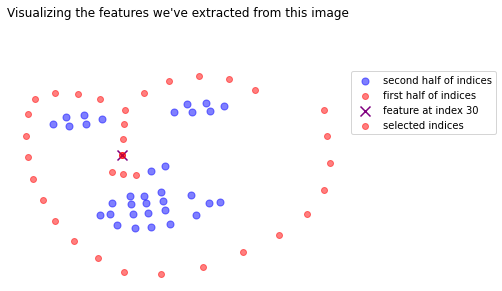

In [ ]:
show_index = 30
show_indices(landmarks, show_index)

In [ ]:
np.array(landmarks).shape

(68, 2)

Modifying inputs to to `plot_image_landmarks` function to detect and display different parts of the face individually using Facial landmarks.

Enter a facial landmark(eyes, nose, mouth, jawline, or eyebrow: mouth
[(591, 867), (610, 836), (638, 818), (661, 819), (687, 809), (734, 817), (780, 833), (743, 867), (701, 890), (672, 897), (647, 900), (618, 893), (607, 864), (641, 839), (664, 837), (691, 831), (763, 835), (694, 854), (667, 861), (643, 863)]


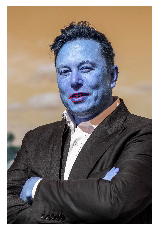

In [ ]:
landmark_indices = {'eyes':(36,47),
                    "nose":(27,35),
                    "mouth":(48,67),
                    "jawline":(0,17),
                    "eyebrow":(18,27)}

landmark = input("Enter a facial landmark(eyes, nose, mouth, jawline, or eyebrow: ")
points = np.array(landmark_indices.get(landmark))
selected_landmarks = landmarks[points[0]:points[1]+1]
print(selected_landmarks)
plot_image_landmarks(image, selected_landmarks)

Finding Euclidean distance

In [ ]:
def euclidean_distance(p1,p2):
  """
  type p1, p2 : tuple--> (x,y)
  rtype distance: float
  """
  distance =  math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
  return distance

Differenciating between open and close eyes between two images

In [ ]:
def classify_images(image1_path, image2_path, plt_flag):
  """
  type image1_path,image2_path: str
  rtype : str
  """
  
  image1,image1_landmarks = get_landmarks(image1_path)
  image2,image2_landmarks = get_landmarks(image2_path)
  
  if plt_flag:
    #Plot image1
    plt.imshow(image1, interpolation='nearest')
    plt.title("Image1")
    plt.show()

    #Plot image2
    plt.imshow(image2, interpolation='nearest')
    plt.title("Image2")
    plt.show()
    
  
  # Points of interest for eyes among which distance needs to be computed
  pairs_distance = [(37,41),(38,40),(43,47),(44,46)]
  
  e_sum1 = 0
  e_sum2 = 0
  threshold_value = 10
  for pair in pairs_distance:
    
    e_sum1 = e_sum1 + euclidean_distance(image1_landmarks[pair[0]],
                                         image1_landmarks[pair[1]])
    e_sum2 = e_sum2 + euclidean_distance(image2_landmarks[pair[0]],
                                         image2_landmarks[pair[1]])
  print (e_sum1,e_sum2)
  
  e_difference = e_sum1 - e_sum2
  print (e_difference)
  if int(e_difference) == 0:
    return ("Both images have eyes open or closed")
  
  if abs(e_difference) >= threshold_value:
     
    if e_difference > 0:
        return ("Image1 : Eyes Open, Image2 : Eyes Close")
    else:
        return ("Image1 : Eyes Close, Image2 : Eyes Open")
   